# Portuguese Bank Marketing – Predictive Analysis

## Problem Statement
The objective of this project is to analyze bank marketing data and build
a predictive model to identify customers who are likely to subscribe
to a term deposit.


## Importing Required Libraries
This step involves importing Python libraries required for data
* manipulation
* visualization
* machine learning


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Loading the Dataset
The dataset is loaded using pandas.


In [48]:
data=pd.read_csv("bank-additional-full.csv",sep=';')

## Understanding the Dataset
This step helps in understanding the structure of the dataset,
including number of rows, columns, data types, and missing values.


In [49]:
data.shape

(41188, 21)

In [50]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [51]:
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [53]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [54]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [55]:
data.duplicated().sum()

12

In [56]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [57]:
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


## Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is performed to understand patterns,
relationships, and trends in the data. It helps identify important
features that influence whether a customer subscribes to a term deposit.


### Target Variable Distribution
This analysis shows the proportion of customers who subscribed
to the term deposit versus those who did not.


In [58]:
data['y'].value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

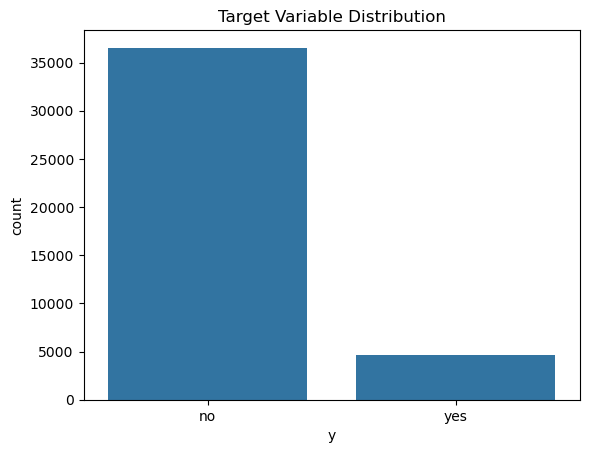

In [59]:
sns.countplot(x='y', data=data)
plt.title("Target Variable Distribution")
plt.show()


### Insights:

* Most customers did not subscribe
* Dataset is imbalanced


### Age vs Term Deposit Subscription
This analysis examines how customer age influences the
subscription to term deposits.


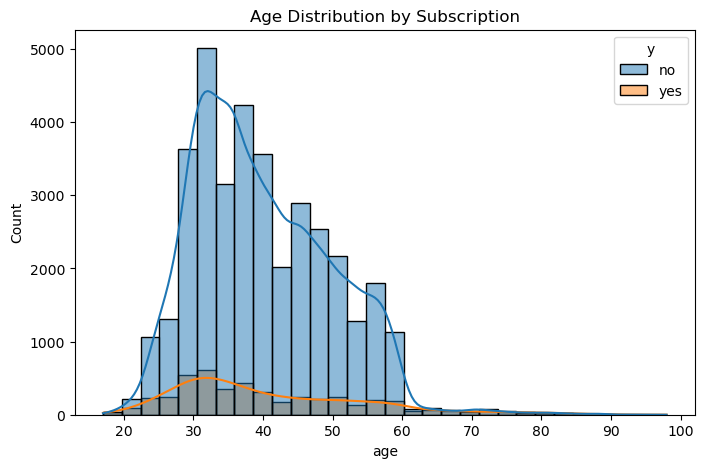

In [60]:
plt.figure(figsize=(8,5))
sns.histplot(data=data, x='age', hue='y', bins=30, kde=True)
plt.title("Age Distribution by Subscription")
plt.show()


### Insights:

* Middle-aged and older customers are more likely to subscribe
* Younger customers show lower subscription rate

### Job vs Term Deposit Subscription
This analysis examines how customer Job influences the subscription to term deposits.

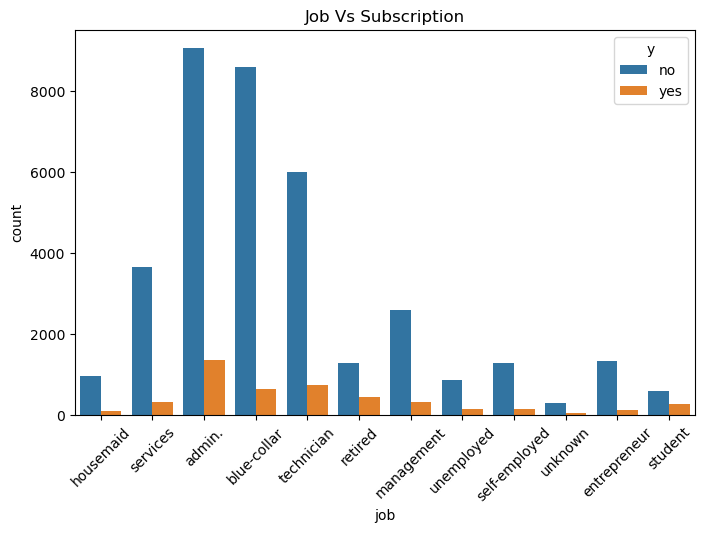

In [61]:
plt.figure(figsize=(8,5))
sns.countplot(data=data, x='job', hue='y')
plt.title("Job Vs Subscription")
plt.xticks(rotation=45) # to adjust the size of xlabels
plt.show()



### Insight
* Retired and students show higher subscription rates
* Blue-collar jobs show lower response



### Marital Status vs Subscription
This analysis studies the relationship between marital status
and term deposit subscription.


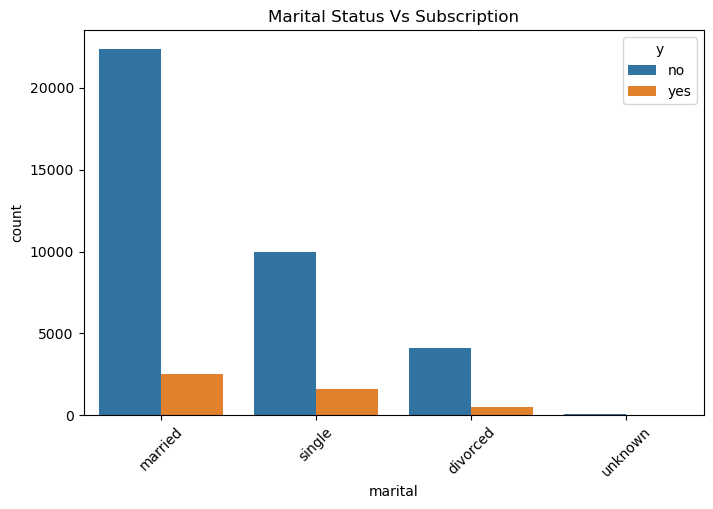

In [62]:
plt.figure(figsize=(8,5))
sns.countplot(data=data, x='marital', hue='y')
plt.title("Marital Status Vs Subscription")
plt.xticks(rotation=45) # to adjust the size of xlabels
plt.show()


### Insights:
* Married customers form the majority
* Single customers show slightly higher conversion ratio

### Education Level vs Subscription
This analysis explores how education level impacts customer decisions.


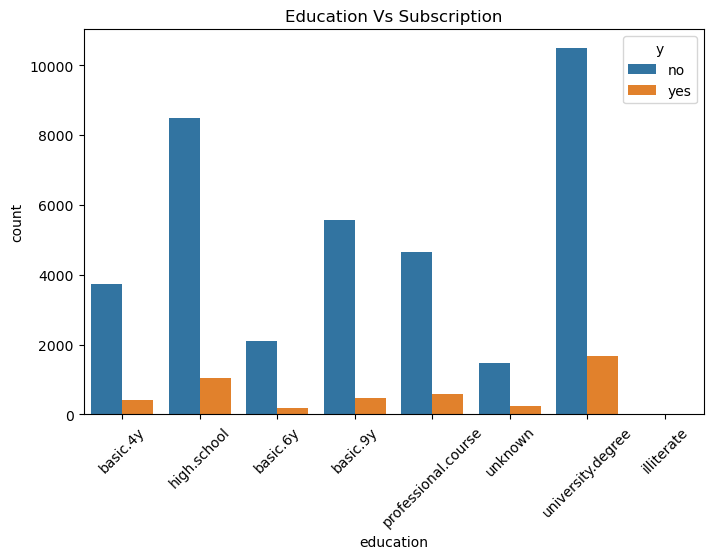

In [63]:
plt.figure(figsize=(8,5))
sns.countplot(data=data, x='education', hue='y')
plt.title("Education Vs Subscription")
plt.xticks(rotation=45) # to adjust the size of xlabels
plt.show()


### Insight
* University degree holders subscribe more
* Lower education levels show less interest



### Loan and Housing Status vs Subscription
This analysis checks whether customers with loans
are likely to subscribe to term deposits.


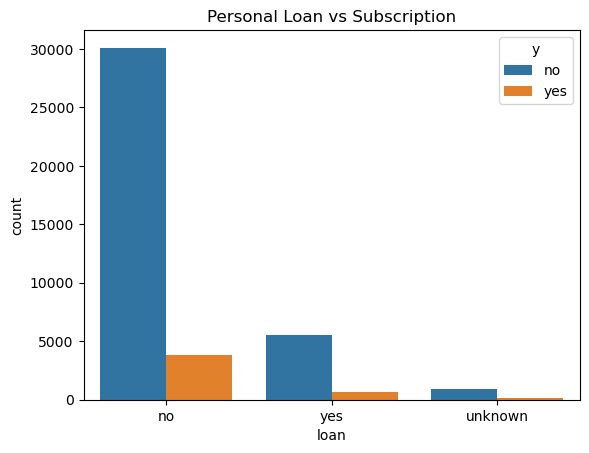

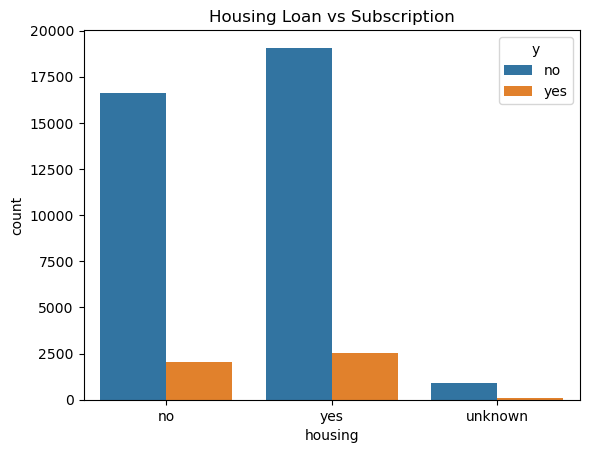

In [64]:
sns.countplot(x='loan', hue='y', data=data)
plt.title("Personal Loan vs Subscription")
plt.show()

sns.countplot(x='housing', hue='y', data=data)
plt.title("Housing Loan vs Subscription")
plt.show()


### Insights:

* Customers without loans are more likely to subscribe
* Loan burden affects investment decisions

### Previous Campaign Outcome vs Subscription
This analysis evaluates how previous campaign results
affect current subscription behavior.
* this is very important 


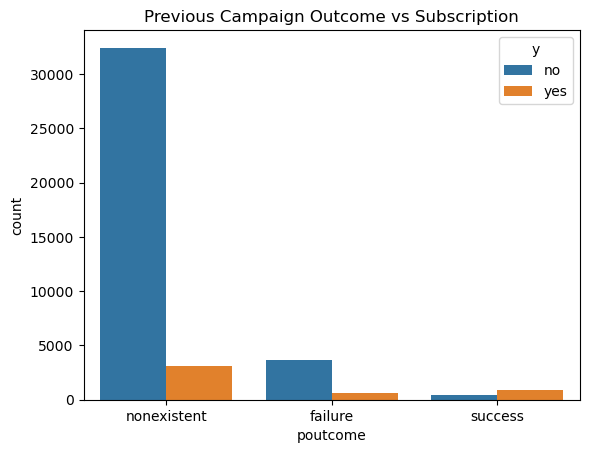

In [65]:
sns.countplot(x='poutcome', hue='y', data=data)
plt.title("Previous Campaign Outcome vs Subscription")
plt.show()


### Insight
* Customers with successful previous outcome are highly likely to subscribe
* This is a strong predictor

### Correlation Heatmap
This heatmap shows the correlation between numerical variables
to identify strong relationships.


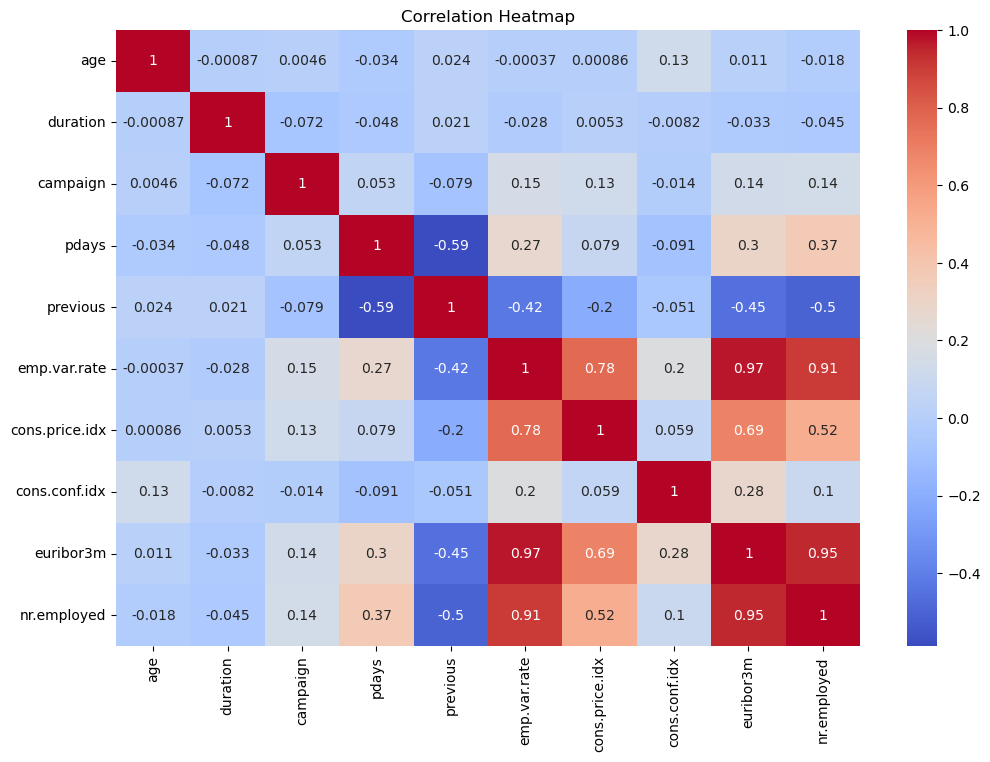

In [66]:
plt.figure(figsize=(12,8))
numeric_data = data.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_data.corr(), cmap='coolwarm', annot=True)
plt.title("Correlation Heatmap")
plt.show()


Correlation analysis was performed to understand relationships between
numerical variables. Although some economic indicators show high
correlation among themselves, no features were removed solely based
on correlation, as tree-based models used in this project can handle
multicollinearity effectively.


## Summary of Exploratory Data Analysis


<b> The exploratory data analysis revealed several important insights 
about customer behavior and campaign effectiveness. Factors such as
age, job type, education level, loan status, and previous campaign
outcomes significantly influence the likelihood of subscribing to
a term deposit. Customers with successful outcomes in previous
campaigns show a much higher probability of subscription. These
insights guide the feature selection and preprocessing steps for
building predictive models.
</b>


## Data Cleaning and Preprocessing

This section focuses on preparing the dataset for machine learning
by handling irrelevant features, missing values, and categorical
variables.


Dropping Irrelevant Feature (duration) 

Why duration must be dropped
* It is known only after the call
* Using it causes data leakage
* Unrealistic for real-world prediction

In [67]:
data=data.drop(columns=['duration'])

In [68]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

## Handling Unknown Values

In [69]:
categorical_cols = data.select_dtypes(include='object').columns

for col in categorical_cols:
    print(f"\n{col} value counts:")
    print(data[col].value_counts())



job value counts:
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

marital value counts:
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

education value counts:
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64

default value counts:
default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64

housing value counts:
housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64

loan value counts:
loan
no         3

### Handling Unknown Values

Several categorical features contain the value "unknown", which
represents missing or unavailable information. Instead of removing
these records, the "unknown" category is retained as a valid class
to avoid data loss and preserve real-world data characteristics.


### Encoding Categorical Variables

* Machine learning algorithms require numerical input data.
* Categorical variables are converted into numerical format using
one-hot encoding to ensure that no ordinal relationship is assumed
between categories.


In [70]:
# Separate features and target
x=data.drop('y',axis=1)
y=data['y']

In [71]:
# One-hot encoding on  categorical variables
x_encoded = pd.get_dummies(x, drop_first=True)


In [72]:
# Encoding target variable
y_encoded = y.map({'no': 0, 'yes': 1})


In [73]:
x_encoded.head()



,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,False,...,True,False,False,False,True,False,False,False,True,False
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,False,...,True,False,False,False,True,False,False,False,True,False
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,False,...,True,False,False,False,True,False,False,False,True,False
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,False,...,True,False,False,False,True,False,False,False,True,False
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,False,...,True,False,False,False,True,False,False,False,True,False


In [74]:
x_encoded.shape

(41188, 52)

### Train-Test Split

The dataset is divided into training and testing sets to evaluate
model performance on unseen data. Stratified sampling is used to
maintain the class distribution.


In [75]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x_encoded,
    y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)


In [76]:
x_train.shape, x_test.shape


((32950, 52), (8238, 52))

## Model Building

### 1.Logistic Regression

Logistic Regression is used as a baseline classification model to
predict whether a customer will subscribe to a term deposit.


In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train model
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [78]:
# Predictions
y_pred_lr = lr.predict(x_test)


### Model Evaluation

In [79]:

print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Accuracy: 0.9011896091284293
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7310
           1       0.71      0.21      0.32       928

    accuracy                           0.90      8238
   macro avg       0.81      0.60      0.64      8238
weighted avg       0.89      0.90      0.88      8238



<b>Logistic Regression achieved high overall accuracy; however, the recall
for customers who subscribed to term deposits is relatively low.
This indicates that while the model performs well in identifying
non-subscribers, it struggles to capture potential subscribers.
Therefore, more advanced models are explored to improve recall.</b>


### 2.Decision Tree Classifier

Decision Tree is a non-linear classification model that splits data
based on feature conditions. It helps capture complex relationships
between customer attributes and subscription behavior.


In [80]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialising model
dt = DecisionTreeClassifier(
    random_state=42,
    max_depth=6,        #helps to control overfitting
    min_samples_split=50
)


In [81]:
# Train model
dt.fit(x_train, y_train)

# Predictions
y_pred_dt = dt.predict(x_test)

#### Model Evaluation

In [82]:

print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Accuracy: 0.9020393299344501
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      7310
           1       0.67      0.26      0.37       928

    accuracy                           0.90      8238
   macro avg       0.79      0.62      0.66      8238
weighted avg       0.89      0.90      0.88      8238



<b>Compared to Logistic Regression, the Decision Tree model shows
an improvement in recall and F1-score for customers who subscribed
to term deposits. This indicates better identification of potential
customers, although further improvement is required.</b>


### 3.Random Forest Classifier

Random Forest is an ensemble learning method that combines multiple
decision trees to improve prediction accuracy and robustness. It is
well-suited for handling complex and imbalanced datasets.


In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

#Intitialize Random Forest Model
RF= RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced', #VERY IMPORTANT for imbalance
    max_depth=8,
    min_samples_split=50
)



In [84]:
#Train Model 
RF.fit(x_train,y_train)

#making predictions
y_pred_rf=RF.predict(x_test)

#### Model Evaluation


In [85]:
print("Accuracy:",accuracy_score(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))

Accuracy: 0.8477785870356883
              precision    recall  f1-score   support

           0       0.95      0.87      0.91      7310
           1       0.39      0.64      0.49       928

    accuracy                           0.85      8238
   macro avg       0.67      0.76      0.70      8238
weighted avg       0.89      0.85      0.86      8238



<b>The Random Forest model significantly improves the identification of
customers likely to subscribe to term deposits. Although overall
accuracy is slightly lower, the model achieves a high recall of 64%
for subscribers, which is crucial for banking marketing campaigns.
This makes Random Forest the most suitable model for deployment.</b>


<b>Three different classification models were implemented and compared:
* Logistic Regression as a baseline model,
* Decision Tree to capture non-linear relationships,
* Random Forest as an ensemble method.
This combination provides a comprehensive comparison and satisfies
the project requirements.</b>


## Model Comparison

The performance of multiple machine learning models is compared using
evaluation metrics such as accuracy, precision, recall, and F1-score.
Special emphasis is given to recall and F1-score for the subscriber
class, as identifying potential customers is critical for banking
marketing applications.


## Comparison Table

In [86]:
import pandas as pd

model_comparison = pd.DataFrame({
    'Model': [
        'Logistic Regression',
        'Decision Tree',
        'Random Forest'
    ],
    'Accuracy': [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_rf)
    ],
    'Precision (Yes)': [
        0.70,
        0.67,
        0.39
    ],
    'Recall (Yes)': [
        0.22,
        0.26,
        0.64
    ],
    'F1-score (Yes)': [
        0.33,
        0.37,
        0.49
    ]
})

model_comparison


,Model,Accuracy,Precision (Yes),Recall (Yes),F1-score (Yes)
0,Logistic Regression,0.901190,0.70,0.22,0.33
1,Decision Tree,0.902039,0.67,0.26,0.37
2,Random Forest,0.847779,0.39,0.64,0.49


<b>A model comparison table is generated using Python to compare the
performance of different classifiers. The comparison highlights
that Random Forest achieves the highest recall and F1-score for
customers who subscribed to term deposits.</b>


## Business Suggestions and Recommendations

Based on the exploratory data analysis and predictive modeling results,
the following recommendations are suggested to improve the effectiveness
of bank marketing campaigns.


#### 1. Focus on High-Probability Customers(MOST IMPORTANT)
 Customers predicted as likely subscribers by the Random Forest model
 should be prioritized for marketing calls, as the model identifies a
 significant portion of potential buyers.


#### 2. Target Customers with Successful Previous Campaign Outcomes
 Customers who had a successful outcome in previous marketing campaigns
 show a much higher likelihood of subscribing again. These customers
 should be given high priority during campaigns.


#### 3. Focus on Customers Without Existing Loans
 Customers without personal or housing loans are more likely to invest
 in term deposits. Marketing efforts should focus more on these segments.


#### 4.Segment Customers Based on Age & Job Type
 Middle-aged and retired customers show higher subscription rates.
 Job categories such as retired, students, and management roles
 demonstrate better response to term deposit offers.


#### 5.Optimize Call Timing and Frequency
 Campaign data suggests that excessive calls reduce customer interest.
 The bank should limit the number of calls per customer and focus on
 optimal days and months for outreach.


#### 6.Use Data-Driven Campaign Planning
 Economic indicators such as interest rates and employment levels
 impact customer investment decisions. Marketing strategies should
 be adjusted based on prevailing economic conditions.



#### Summary of Business Value
<b>Implementing these recommendations can help the bank reduce marketing
costs, improve customer targeting, and significantly increase the
subscription rate for term deposits through data-driven decision-making.</b>


## Challenges Faced

During the execution of this project, several challenges were
encountered. The following section outlines these challenges and
the approaches used to address them.


#### 1. Class Imbalance in Target Variable
 The dataset was highly imbalanced, with significantly fewer customers
 subscribing to term deposits. This made accuracy an unreliable metric.
 To address this, recall and F1-score were prioritized, and class
 balancing techniques were applied in the Random Forest model.

#### 2. Presence of Categorical Variables
 Many features in the dataset were categorical in nature and could
 not be directly used in machine learning models. One-hot encoding
 was applied to convert categorical variables into numerical format
 without introducing ordinal relationships.

#### 3. Data Leakage Due to Call Duration
 The 'duration' feature was highly correlated with the target variable
 but was only available after the marketing call. Including this feature
 would cause data leakage, so it was removed to maintain realistic
 model predictions.

#### 4. Handling "Unknown" Values
 Several features contained the value 'unknown', representing missing
 or unavailable information. Instead of removing these records, the
 'unknown' category was retained to avoid data loss and reflect real-
 world data scenarios.

#### 5. Model Selection Trade-offs
 Some models achieved high accuracy but failed to identify a sufficient
 number of potential subscribers. Balancing accuracy with business-
 critical recall required careful model comparison and evaluation.
 



## Conclusion

<b>This project focused on analyzing bank marketing data to predict whether
a customer would subscribe to a term deposit. Through exploratory data
analysis, important patterns related to customer demographics, financial
status, and previous campaign outcomes were identified.</b> 

<b>Multiple machine learning models were implemented and compared,
including Logistic Regression, Decision Tree, and Random Forest.
Although Logistic Regression and Decision Tree achieved high overall
accuracy, they performed poorly in identifying potential subscribers.

<b>The Random Forest model, with class balancing, demonstrated superior
performance by significantly improving recall and F1-score for customers
who subscribed to term deposits. This makes it the most suitable model
for supporting data-driven decision-making in bank marketing campaigns.

<b>By leveraging the insights and predictive capabilities of this model,
banks can optimize their marketing strategies, reduce operational costs,
and increase conversion rates by targeting high-probability customers.</b>


Note: This Jupyter Notebook serves as the complete data analysis report,
predictive modeling implementation, and business recommendation document
as required by the project tasks.
